In [1]:
import random


def simulate_admissions(num_applicants, p_math, p_table_tennis):
    """Simulates college admissions and returns applicant data."""
    admitted = []
    for _ in range(num_applicants):
        good_math = random.random() < p_math
        good_table_tennis = random.random() < p_table_tennis
        is_admitted = good_math or good_table_tennis
        admitted.append((good_math, good_table_tennis, is_admitted))
    return admitted


def analyze_admissions(admitted):
    """Analyzes simulation data for conditional dependence."""
    admitted_only = [
        x[:2] for x in admitted if x[2]
    ]  # Filter for admitted applicants only.

    # Calculate P(M|A) and P(T|A):
    p_m_given_a = (
        sum([x[0] for x in admitted_only]) / len(admitted_only) if admitted_only else 0
    )
    p_t_given_a = (
        sum([x[1] for x in admitted_only]) / len(admitted_only) if admitted_only else 0
    )

    # Calculate P(M and T|A):
    p_m_and_t_given_a = (
        sum([x[0] and x[1] for x in admitted_only]) / len(admitted_only)
        if admitted_only
        else 0
    )

    print(f"P(M|A): {p_m_given_a:.3f}")
    print(f"P(T|A): {p_t_given_a:.3f}")
    print(f"P(M and T|A): {p_m_and_t_given_a:.3f}")

    if (
        abs(p_m_given_a * p_t_given_a - p_m_and_t_given_a) > 0.05
    ):  # Check for dependence (using a threshold).
        print("M and T are likely NOT conditionally independent given A")
    else:
        print("M and T are likely conditionally independent given A")


# Example usage:
num_applicants = 10000
p_math = 0.3  # Probability of being good at math
p_table_tennis = 0.2  # Probability of being good at table tennis

admitted = simulate_admissions(num_applicants, p_math, p_table_tennis)
analyze_admissions(admitted)

P(M|A): 0.683
P(T|A): 0.454
P(M and T|A): 0.137
M and T are likely NOT conditionally independent given A


## 2. Non-Code Simulation:

1. **Create a table**: Make a table with columns for Math (M), Table Tennis (T), and Admission (A). Each row represents an applicant.

2. **Populate the table**: Let's say you have 100 applicants. Fill in the M and T columns randomly based on the probabilities. For example, if P(M) = 0.3, then roughly 30 applicants should have "Good" in the Math column, and 70 should have "Not Good." Do the same for Table Tennis.

3. **Determine admissions**: For each applicant, if they have "Good" in either Math OR Table Tennis (or both), mark them as "Admitted" in the A column.

4. **Analyze the admitted students**: Look only at the rows where A is "Admitted." Now, check if M and T are independent within this subset. You'll likely find that if an applicant is good at Math, they're less likely to also be good at Table Tennis (and vice versa), demonstrating the negative correlation.

___

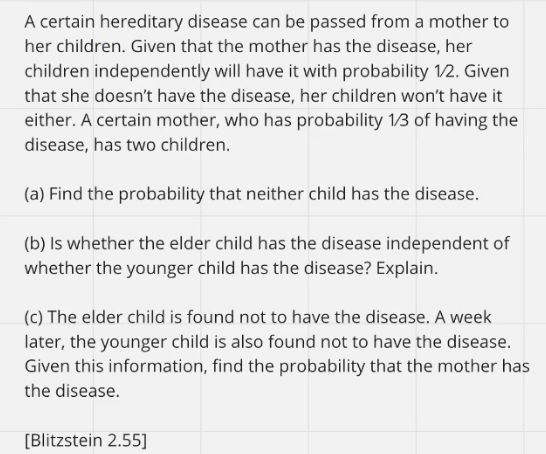

The problem describes a hereditary disease and asks for the probability that neither child has the disease, given some probabilities about the mother and how the disease is transmitted. Here's a step-by-step walkthrough of the solution:

1. **Define Events:**

* M: Mother has the disease.
* Mᶜ: Mother does not have the disease.
* C1: Child 1 has the disease.
* C1ᶜ: Child 1 does not have the disease.
* C2: Child 2 has the disease.
* C2ᶜ: Child 2 does not have the disease.

2. **Given Probabilities:**

* P(M) = 1/3  (Mother has the disease)
* P(Mᶜ) = 1 - P(M) = 2/3 (Mother does not have the disease)
* P(C1|M) = P(C2|M) = 1/2 (Child has disease given mother has it)
* P(C1|Mᶜ) = P(C2|Mᶜ) = 0 (Child has disease given mother does not have it)
* Since children inherit the disease independently *given* the mother's status:
    P(C1∩C2|M) = P(C1|M) * P(C2|M) = (1/2) * (1/2) = 1/4
    P(C1ᶜ∩C2|M) = P(C1ᶜ|M) * P(C2|M) = (1/2) * (1/2) = 1/4, and so on for the other combinations.
    P(C1∩C2|Mᶜ) = P(C1|Mᶜ) * P(C2|Mᶜ) = 0 * 0 = 0
    P(C1ᶜ∩C2ᶜ|Mᶜ) = P(C1ᶜ|Mᶜ) * P(C2ᶜ|Mᶜ) = 1*1 = 1 (Because if the mother doesn't have it, neither can the children)



3. **Goal:** We want to find P(C1ᶜ ∩ C2ᶜ), the probability that neither child has the disease.

4. **Law of Total Probability:** We use the law of total probability, conditioning on the mother's status (M or Mᶜ):

   P(C1ᶜ ∩ C2ᶜ) = P(C1ᶜ ∩ C2ᶜ | M) * P(M) + P(C1ᶜ ∩ C2ᶜ | Mᶜ) * P(Mᶜ)

5. **Substitute values:**

   P(C1ᶜ ∩ C2ᶜ) = (1/4) * (1/3) + (1) * (2/3)
               = 1/12 + 2/3
               = 1/12 + 8/12
               = 9/12
               = 3/4

Therefore, the probability that neither child has the disease is 3/4.


___
**(b) Independence of Children Having the Disease:**

No, whether the elder child has the disease is NOT independent of whether the younger child has the disease.  The reason is that both children's disease status depends on the mother's disease status.  If the mother has the disease, *both* children are more likely to have it.  If the mother does not have the disease, *neither* child can have it. This shared dependence on the mother's status creates a dependence between the children's disease status.


Mathematically, to check for independence, we'd need to see if P(C1 ∩ C2) = P(C1)P(C2). We have:
P(C1) = P(C1|M)P(M) + P(C1|Mᶜ)P(Mᶜ) = (1/2)(1/3) + (0)(2/3) = 1/6
similarly, P(C2) = 1/6

P(C1 ∩ C2) = P(C1 ∩ C2 |M)P(M) + P(C1 ∩ C2 | Mᶜ)P(Mᶜ)
            = (1/4)(1/3) + (0)(2/3) = 1/12

Since 1/12 ≠ (1/6)(1/6), the events are not independent.
_____
**(c) Probability Mother Has the Disease Given Neither Child Has It:**

We want to find P(M | C1ᶜ ∩ C2ᶜ). We can use Bayes' theorem:

P(M | C1ᶜ ∩ C2ᶜ) = [P(C1ᶜ ∩ C2ᶜ | M) * P(M)] / P(C1ᶜ ∩ C2ᶜ)

We already have these values:

* P(C1ᶜ ∩ C2ᶜ | M) = 1/4 (from part a)
* P(M) = 1/3
* P(C1ᶜ ∩ C2ᶜ) = 3/4 (from part a)

So,

P(M | C1ᶜ ∩ C2ᶜ) = [(1/4) * (1/3)] / (3/4)
                 = (1/12) / (3/4)
                 = (1/12) * (4/3)
                 = 1/9

Therefore, given that neither child has the disease, the probability that the mother has the disease is 1/9. This makes intuitive sense; if neither child has the disease it reduces the likelihood that the mother carries it, compared to the prior probability of 1/3.
